


<font size='10' color = 'E3A440'>**Mégadonnées et techniques avancées démystifiées**</font>
=======
<font color = 'E3A440'>*Nouvelles méthodes d’analyse et leur implication quant à la gestion des mégadonnées en SSH (partie 2)*</font>
=============


Cet atelier s’inscrit dans le cadre de la formation [Mégadonnées et techniques avancées démystifiées](https://www.4point0.ca/2022/08/22/formation-megadonnees-demystifiees/) (séance 7).

Les sciences humaines et sociales sont souvent confrontées à l’analyse de données non structurées, comme le texte. Après avoir préparé les données, plusieurs techniques d’analyse venant de l’apprentissage automatique peuvent être utilisées. Pendant cet atelier, les participants seront initiés au prétraitement des données textuelles et aux méthodes supervisées et non supervisées à des buts d’analyse avec Python.

Structure de l'atelier :

1. Partie 1 : Exemples de méthodes non supervisées et supervisées appliquées à l'analyse de textes.
2. Partie 2 : Exercices sur les méthodes non supervisées et supervisées

### Auteurs: 
- Bruno Agard <bruno.agard@polymtl.ca>
- Davide Pulizzotto <davide.pulizzotto@polymtl.ca>

Département de Mathématiques et de génie industriel

École Polytechnique de Montréal

# <font color = 'E3A440'>0. Préparation de l'environnement </font>

In [1]:
# Downloading of data from the GitHub project
#!rm -rf Data_techniques_demystified_webinars/
!rm -rf Donnees_demystifiees_seance_6/
#!git clone https://github.com/4point0-ChairInnovation-Polymtl/Data_techniques_demystified_webinars
!git clone https://github.com/puli83/Donnees_demystifiees_seance_6

Cloning into 'Donnees_demystifiees_seance_6'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 138 (delta 23), reused 0 (delta 0), pack-reused 94
Receiving objects: 100% (138/138), 47.54 MiB | 23.79 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [72]:
# Import modules
import os
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
!pip install wordcloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

# <font color = 'E3A440'>1. Prétraitement du corpus (rappels)</font>

Le prétraitement d'un corpus de textes peut nécessiter la mise en place de plusieurs étapes dont : le découpage des phrases, des mots, le nettoyage, le filtrage, etc.

Dans les prochains blocs de code, un texte sera segmenté en phrases et prétraité au moyen de la fonction `CleaningText()` préparée lors de la séance précédente.


In [3]:
text = """At eight o'clock, on Thursday morning, the great Arthur didn't feel VERY good.
This morning, Arthur is feeling better.
A dog runs in the street.
A little boy in running in the street.
Arthur is my dog, he sleeps every morning."""

In [4]:
# extraction des phrases
sentences = nltk.sent_tokenize(text)
print(sentences)

["At eight o'clock, on Thursday morning, the great Arthur didn't feel VERY good.", 'This morning, Arthur is feeling better.', 'A dog runs in the street.', 'A little boy in running in the street.', 'Arthur is my dog, he sleeps every morning.']


In [5]:
# Cleaning fonction to preprocess text
def CleaningText(text_as_string, language = 'english', reduce = '', list_pos_to_keep = [], Stopwords_to_add = []):
    from nltk.corpus import stopwords

    words = nltk.word_tokenize(text_as_string)
    words_pos = nltk.pos_tag(words, tagset='universal')
    words_pos = [(w, pos) for w, pos in words_pos if w.isalnum()]
    words_pos = [(w.lower(), pos) for w, pos in words_pos]
    
    if reduce == 'stem': 
        from nltk.stem.porter import PorterStemmer
        reduced_words_pos = [(PorterStemmer().stem(w), pos) for w, pos in words_pos]
        
    elif reduce == 'lemma':
        from nltk.stem.wordnet import WordNetLemmatizer
        reduced_words_pos = [(WordNetLemmatizer().lemmatize(w), pos) for w, pos in words_pos]
    else:
        import warnings
        reduced_words_pos = words_pos
        warnings.warn("Warning : any reduction was made on words! Please, use \"reduce\" argument to chosse between 'stem' or  'lemma'")
    if list_pos_to_keep:
        reduced_words_pos = [(w, pos) for w, pos in reduced_words_pos if pos in list_pos_to_keep]
    else:
        import warnings
        warnings.warn("Warning : any POS filtering was made. Please, use \"list_pos_to_keep\" to create a list of POS tag to keep.")
    
    list_stopwords = stopwords.words(language) + Stopwords_to_add
    reduced_words_pos = [(w, pos) for w, pos in reduced_words_pos if w not in list_stopwords and len(w) > 1 ]
    return reduced_words_pos   

In [6]:
# nettoyage des phrases, sélection de pos-tag
cleaned_sentences = [CleaningText(sent, reduce = 'stem', list_pos_to_keep = ['NOUN','ADJ','VERB']) for sent in sentences]
print(cleaned_sentences)

[[('thursday', 'NOUN'), ('morn', 'NOUN'), ('great', 'ADJ'), ('arthur', 'NOUN'), ('feel', 'VERB'), ('good', 'ADJ')], [('morn', 'NOUN'), ('arthur', 'NOUN'), ('feel', 'VERB')], [('dog', 'NOUN'), ('run', 'VERB'), ('street', 'NOUN')], [('littl', 'ADJ'), ('boy', 'NOUN'), ('run', 'VERB'), ('street', 'NOUN')], [('arthur', 'NOUN'), ('dog', 'NOUN'), ('sleep', 'VERB'), ('morn', 'NOUN')]]


Voici la liste de POS tag existant.

| **POS** | **DESCRIPTION**           | **EXAMPLES**                                      |
| ------- | ------------------------- | ------------------------------------------------- |
| ADJ     | adjective                 | big, old, green, incomprehensible, first      |
| ADP     | adposition                | in, to, during                                |
| ADV     | adverb                    | very, tomorrow, down, where, there            |
| AUX     | auxiliary                 | is, has (done), will (do), should (do)        |
| CONJ    | conjunction               | and, or, but                                  |
| CCONJ   | coordinating conjunction  | and, or, but                                  |
| DET     | determiner                | a, an, the                                    |
| INTJ    | interjection              | psst, ouch, bravo, hello                      |
| NOUN    | noun                      | girl, cat, tree, air, beauty                  |
| NUM     | numeral                   | 1, 2017, one, seventy-seven, IV, MMXIV        |
| PART    | particle                  | ’s, not                                      |
| PRON    | pronoun                   | I, you, he, she, myself, themselves, somebody |
| PROPN   | proper noun               | Mary, John, London, NATO, HBO                 |
| PUNCT   | punctuation               | ., (, ), ?                                    |
| SCONJ   | subordinating conjunction | if, while, that                               |
| SYM     | symbol                    | $, %, §, ©, +, −, ×, ÷, =, :)               |
| VERB    | verb                      | run, runs, running, eat, ate, eating          |
| X       | other                     | sfpksdpsxmsa                                  |
| SPACE   | space                     |                                                   |

# <font color = 'E3A440'>2. Vectorisation (rappels)</font>

Le contenu des textes peut être représenté sous forme matricielle.

$$X = \begin{bmatrix} 
x_{1,1} & x_{1,2} & \ldots & x_{1,w} \\
\vdots & \vdots       &  \ddots      & \vdots \\ 
x_{n,1} & x_{1,2} & \ldots & x_{n,w} \\
\end{bmatrix}
$$ 

Avec :

- $x_{i,j}$ peut représenter la présence du mot "j" dans le texte $i$,
- $x_{i,j}$ peut mesurer le nombre d'occurences du mot $j$ dans le texte $i$,
- $x_{i,j}$ peut représenter l'**importance** du mot $j$ dans le texte $i$, dans ce cas on utilisera par exemple la métrique tf-idf :
 $$\text{tf-idf}_{i,j}=\text{tf}_{i,j}.log\left(\frac{n}{n_i}\right)$$
 - $\text{tf}_{i,j}$ est la fréquence du terme $i$ dans le document $j$,
 - $n$ nombre total de documents dans l’ensemble de textes à étudier,
 - $n_i$ nombre de documents dans l’ensemble de textes qui contiennent le terme $i$.


Attention aux arguments de la fonction `CountVectorizer()`:

  1. `min_df` : la frequence documentaire minimale qu'un mot doit respecter pour être retenu dans la matrice
  2. `max_df` : la frequence documentaire maximale qu'un mot doit respecter pour être retenu dans la matrice
  3. `ngram_range` : permet d'ajouter les n-grammes (bigrammes, trigrammes, etc.) à la vectorisation

In [7]:
# Initialisation de l'objet
def identity_tokenizer(text):
    return text

# Transforming the word in frequencies
vectorized = CountVectorizer(lowercase = False, # Convert all characters to lowercase before tokenizing
                             min_df = 1, # Ignore terms that have a document frequency strictly lower than the given threshold 
                             max_df = 10, # Ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)
                             stop_words = stopwords.words('english'), # Remove the list of words provided
                             ngram_range = (1, 1), # Get the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
                             tokenizer=identity_tokenizer) # Override the string tokenization step while preserving the preprocessing and n-grams generation steps

Utilisation du "vectorizer" avec une liste de listes de mots (et non une liste de tuples de mots-pos) et création de la matrice avec pondération de fréquence.

In [8]:
# Application du vectorizer
freq_term_DTM = vectorized.fit_transform([[w for w, pos in sent] for sent in cleaned_sentences])

freq_Matrix=pd.DataFrame(freq_term_DTM.toarray(), columns =  [k for k, v in sorted(vectorized.vocabulary_.items(), key=lambda item: item[1])] )
print(freq_Matrix)

   arthur  boy  dog  feel  good  great  littl  morn  run  sleep  street  \
0       1    0    0     1     1      1      0     1    0      0       0   
1       1    0    0     1     0      0      0     1    0      0       0   
2       0    0    1     0     0      0      0     0    1      0       1   
3       0    1    0     0     0      0      1     0    1      0       1   
4       1    0    1     0     0      0      0     1    0      1       0   

   thursday  
0         1  
1         0  
2         0  
3         0  
4         0  


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  % sorted(inconsistent)


Crération de la matrice avec pondéraiton tf-idf.

In [9]:
# Calculate the tfidf matrix
tfidf = TfidfTransformer(norm='l1')
tfidf_DTM = tfidf.fit_transform(freq_term_DTM)

tfidf_Matrix=pd.DataFrame(tfidf_DTM.toarray(), columns =  [k for k, v in sorted(vectorized.vocabulary_.items(), key=lambda item: item[1])] )
print(tfidf_Matrix)

     arthur       boy       dog      feel      good     great     littl  \
0  0.130137  0.000000  0.000000  0.156774  0.194317  0.194317  0.000000   
1  0.312043  0.000000  0.000000  0.375914  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.333333  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.276733  0.000000  0.000000  0.000000  0.000000  0.276733   
4  0.212863  0.000000  0.256433  0.000000  0.000000  0.000000  0.000000   

       morn       run     sleep    street  thursday  
0  0.130137  0.000000  0.000000  0.000000  0.194317  
1  0.312043  0.000000  0.000000  0.000000  0.000000  
2  0.000000  0.333333  0.000000  0.333333  0.000000  
3  0.000000  0.223267  0.000000  0.223267  0.000000  
4  0.212863  0.000000  0.317842  0.000000  0.000000  


# <font color = 'E3A440'>3. Méthodes non supervisées</font>


## <font color = 'E3A440'>3.0. Segmentation </font>


Le but de la segmentation est de diviser un ensemble de données en sous ensembles plus petits qui partagent certaines caractéristiques.

On veut que les éléments au sein d'un même sous groupe soit le plus similaires possibles.

Une grande majorité des méthodes de segmentation est alors basée sur des métriques de distance.



### <font color = 'E3A440'>3.1. Métriques de distance </font>




#### <font color = 'E3A440'>3.1.1. Distances entre points </font>

Il existe de nombreuses métriques pour évaluer la similarité/distance entre deux points :


### Distance Euclidienne

$$d(x_1,x_2) = \sqrt{\sum_i^n\left(x_{1,i},x_{2,i}\right)^2}$$


### Distances de Hamming

En nombre de coordonnées différentes

$$d_1(x_1,x_2) = \sum_i^n\delta_i$$


\begin{split}
    Tel\ que\ :&\\ 
    &\delta_i=\begin{cases}  
    0,\ if\ x_{1,i} = x_{2,i}\\
    Sinon\ 1\\
    \end{cases}
\end{split}


En nombre de coordonnées différentes "positives"

$$d_2(x_1,x_2) = \sum_i^n\delta_i$$


\begin{split}
    Tel\ que\ :&\\ 
    &\delta_i=\begin{cases}  
    0,\ if\ x_{1,i} = x_{2,i} = 1\\
    Sinon\ 1\\
    \end{cases}
\end{split}

En pourcentage de coordonnées différentes / "positives"

$$d_3(x_1,x_2) = \frac{d_1(x_1,x_2)\ ou\ d_2(x_1,x_2)}{n}$$

Avec différentes pondérations possibles

$$d_4(x_1,x_2) = \sum_i^n\delta_i$$


\begin{split}
    Tel\ que\ :&\\ 
    &\delta_i=\begin{cases}  
    p,\ if\ x_{1,i} = x_{2,i} = 1\\
    1,\ if\ x_{1,i} = x_{2,i} = 0\\ 
    Sinon\ 0\\
    \end{cases}
\end{split}


Il existe d'autres versions 'adaptées" de Hamming...




### Plein d'autres ...

Mais aucune ne fait vraiment ce que vous aurez besoin, car votre besoin est unique.





#### <font color = 'E3A440'>3.1.2. Hypermétriques, distances entre groupes </font>


 - Plus proche voisin (single linkage)
 - Voisin le plus éloigné (complete linkage)
 - Distance moyenne (average linkage)
 - Distance au centre de gravité
 - ...





### <font color = 'E3A440'>3.2. Normalisation des données </font>

Pour les algorithmes basés sur la distance, il est important de normaliser les données :

In [10]:
from scipy.spatial import distance

X = np.array([[100000, 0, 0, 0, 0, 0, 0],
              [100000, 1, 1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1, 1, 1],
             ])

print(X)

[[100000      0      0      0      0      0      0]
 [100000      1      1      1      1      1      1]
 [     1      1      1      1      1      1      1]]


In [11]:
print( distance.euclidean(X[0], X[1]) )
print( distance.euclidean(X[1], X[2]) )

2.449489742783178
99999.0


#### Normalisation décimale

In [12]:
XD=X.copy()
XD[:, 0] = XD[:, 0]/100000

print(XD)

[[1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1]]


In [13]:
print( distance.euclidean(XD[0], XD[1]) )
print( distance.euclidean(XD[1], XD[2]) )

2.449489742783178
1.0


#### Normalisation Min/max

In [14]:
from sklearn.preprocessing import MinMaxScaler

XmM=X.copy()
scaler = MinMaxScaler().fit(XmM)
XmM=scaler.transform(XmM)
#X=scaler.inverse_transform(X)

print(XmM)

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1.]]


In [15]:
print( distance.euclidean(XmM[0], XmM[1]) )
print( distance.euclidean(XmM[1], XmM[2]) )

2.449489742783178
1.0


#### Normalisation sur la variance

In [16]:
from sklearn.preprocessing import StandardScaler

XV=X.copy()
scaler = StandardScaler().fit(XV)
XV=scaler.transform(XV)
#X=scaler.inverse_transform(X)

print(XV)

[[ 0.70710678 -1.41421356 -1.41421356 -1.41421356 -1.41421356 -1.41421356
  -1.41421356]
 [ 0.70710678  0.70710678  0.70710678  0.70710678  0.70710678  0.70710678
   0.70710678]
 [-1.41421356  0.70710678  0.70710678  0.70710678  0.70710678  0.70710678
   0.70710678]]


In [ ]:
print( distance.euclidean(XV[0], XV[1]) )
print( distance.euclidean(XV[1], XV[2]) )

5.196152422706631
2.1213203435596424


### <font color = 'E3A440'>3.3. Algorithmes de segmentation </font>

Il existe de nombreux algorithmes pour réaliser la segmentation d'un ensemble de données. On choisi un algorithme particulier en fonction du type de données et du type de résultat que l'on cherche.

In [17]:
# Draw fonction to plot results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import unique
from numpy import where

def draw(X,yhat):
    # retrieve unique clusters
    clusters = unique(yhat)

    #plt.figure(figsize=(10, 10))
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1])

    plt.title("Clusters")
    # show the plot
    plt.show() 

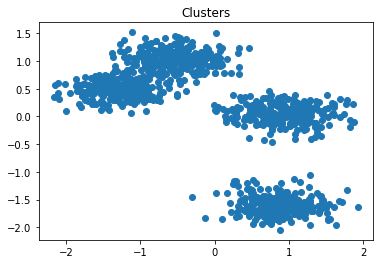

In [18]:
#dataset generator
k=4
n_samples=1000
features=3

# define dataset
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, _ = make_blobs(n_samples, centers=k, n_features=features, cluster_std=0.6, random_state=0)

scaler = StandardScaler().fit(X)
X=scaler.transform(X)
#X=scaler.inverse_transform(X)

yhat=np.zeros(n_samples)
    
draw(X,yhat)

#### <font color = 'E3A440'>3.3.1. k-means</font>
L'application d'un algorithme de <font color='E3A440'>**segmentation**</font> à une base de données permet de segmenter les observations dans des groupes de données homogènes.

Pour ce faire, l'objectif de l'algorithme k-means est de minimiser l'inertie intra-classe autour d'un représentant de chaque groupe. Pour k-means, le représentant que chaque groupe est la moyenne de ce groupe. Les représentants sont remis à jour à chaque itération lors de l'apprentissage.

La méthode k-means génère un vecteur  $Y$ de taille $n$, qui contient les <font color='E3A440'>**étiquettes des groupes**</font> assignées à chaque observation. Les étiquettes peuvent aller de $0$ à $k$. $k$ est le paramètre qui permet à l'usager de déterminer le nombre de groupes à générer. 

$$
Y = \begin{bmatrix} 
c_1 \\
c_2 \\
\vdots \\ 
c_n
\end{bmatrix}$$

$Y_i$ correspond au groupe attribué à $X_i$.

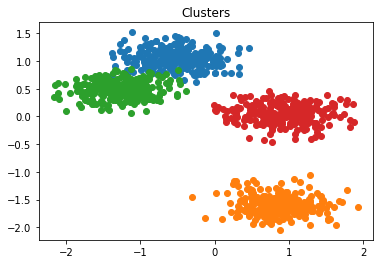

In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4).fit(X)

# assign a cluster to each example
yhatkm = model.predict(X)

draw(X,yhatkm)

##### Que ce passe-t-il à chaque itération ?

L'algorithme exécute les étapes suivantes: 
 1. **Initialisation des représentants** : k points (*k* est choisi par l'usager) sont sélectionnés aléatoirement parmis l'ensemble de données. Chacun de ces points sera utilisé comme représentant d'un groupe pour la première itération. Chaque représentant portera l'étiquette du groupe qu'il représente.
 
 2. **Début des itérations**:

   2.1. **Classification**: Assigner à chaque point de l'ensemble de données l'étiquette du représentant qui lui est le plus proche.

   2.2. **Mise à jour des représentants**: Pour chaque groupe généré, calculer le "centre" des données associées au groupe. Ce centre sera le nouveau représentant pour le groupe.

   2.3. **Répétition**: Répéter les opérations 2.1. et 2.2. jusqu'à un critère d'arrêt (stabilisation des représentants, nombre d'itérations, temps de calcul...).


Iteration : 1


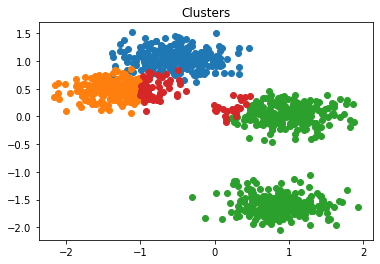

Iteration : 2


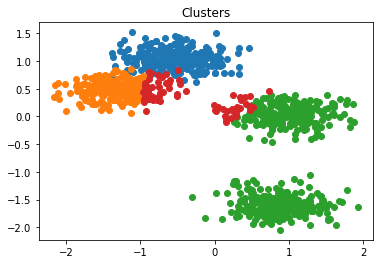

Iteration : 3


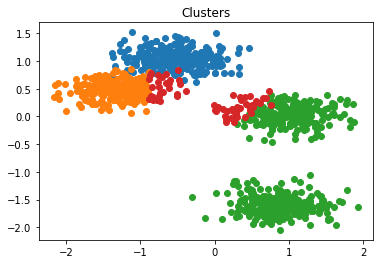

...
...
...

Iteration : 10


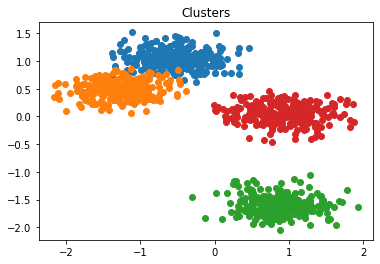

In [20]:
k=4

for i in range (1,4) :
    print("Iteration :", i)
    model = KMeans(n_clusters=k, max_iter=i, n_init=1, init="random", random_state=1).fit(X)
    # assign a cluster to each example
    yhatkm = model.predict(X)
    draw(X,yhatkm)

print("...\n...\n...\n")

i=10
print("Iteration :", i)
model = KMeans(n_clusters=k, max_iter=i, n_init=1, init="random", random_state=1).fit(X)
# assign a cluster to each example
yhatkm = model.predict(X)
draw(X,yhatkm)

##### Sensibilité à l'initialisation


Random state : 1


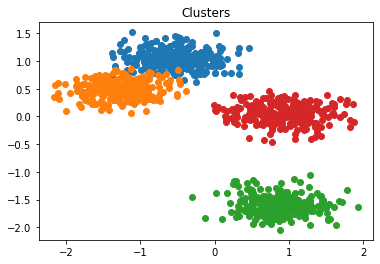

Random state : 2


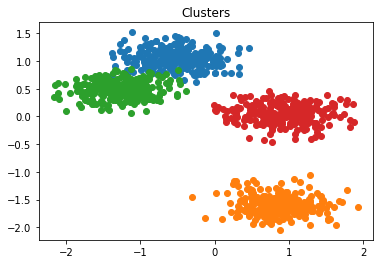

Random state : 3


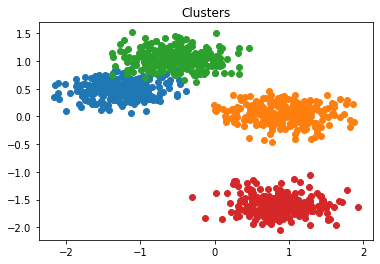

Random state : 4


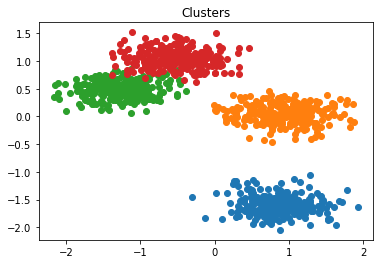

Random state : 5


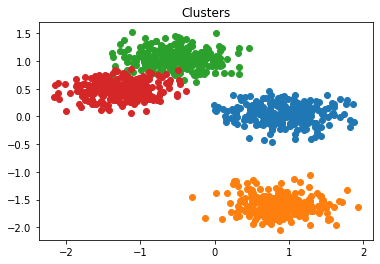

In [21]:
for rs in range (1,6) :
    print("Random state :", rs)
    model = KMeans(n_clusters=k, n_init=1, init="random", random_state=rs).fit(X)
    # assign a cluster to each example
    yhatkm = model.predict(X)
    draw(X,yhatkm)

Conclusions :

 - K-means est sensible aux choix initial des représentants, cet algorithme donne un optimum LOCAL.
 
 - L'initialisation a un impact sur les résultats du k-means, donc sur la qualité du partitionnement.

 - Pour compenser, on peut :
 
     - choisir judiscieusement les points d'initialisation en fonction de notre connaissance du problème,

     - appliquer k-means avec différents points de départ et garder le meilleur résultat,
         
     - appliquer des méthodes spécifiques d'initalisation, parmis lesquelles il y a *k-means++*.

##### Sensibilité au nombre de groupes

Le paramètre *k* détermine le nombre de groupes souhaités. La méthode est très sensible à ce paramètre, et il doit être choisi judiscieusement.

k =  1


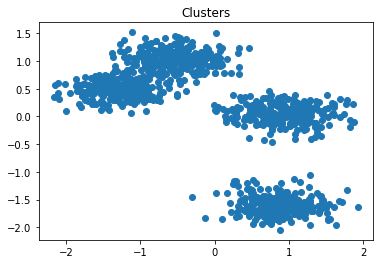

k =  2


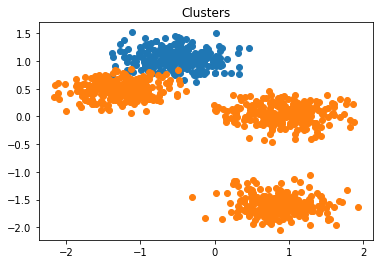

k =  3


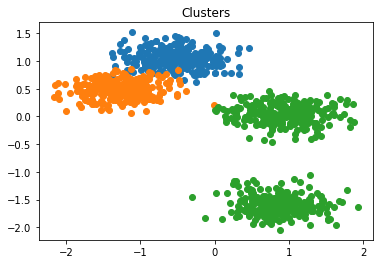

k =  4


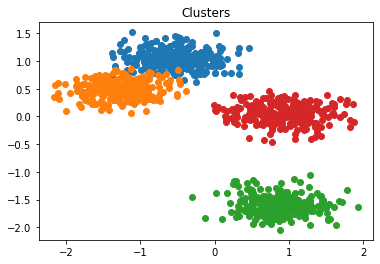

k =  5


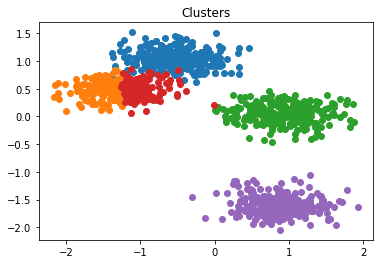

In [22]:
for m in range (1,6) :
    print("k = ", m)
    model = KMeans(n_clusters=m, max_iter=20, n_init=1, init="random", random_state=1).fit(X)
    # assign a cluster to each example
    yhatkm = model.predict(X)
    draw(X,yhatkm)

Conclusion :

  - un mauvais nombre de groupes peut donner des groupes qui ne font pas de sens dans le but de l'analyse.

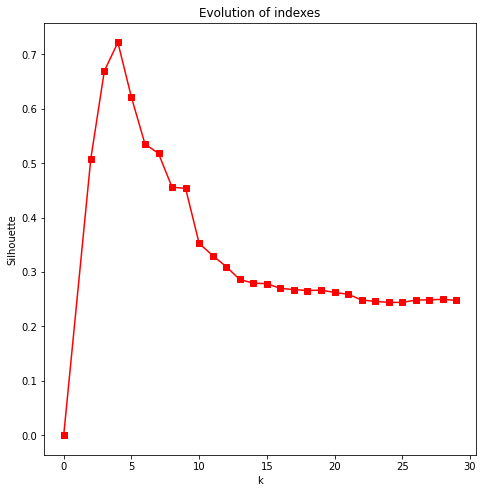

In [23]:
from sklearn.metrics import silhouette_score

max=30
Sil=np.zeros(max)
x_axis=np.zeros(max)

for m in range (2,max) :

    model = KMeans(n_clusters=m, max_iter=100, n_init=1, init="random", random_state=3).fit(X)

    # assign a cluster to each example
    labels = model.predict(X)

    Sil[m]=silhouette_score(X, labels, metric="euclidean")
    x_axis[m]=m

fig = plt.figure(figsize=(6, 6))
a1 = fig.add_axes([0,0,1,1])
l1 = a1.plot(x_axis,Sil,'rs-') # solid line with yellow colour and square marker
a1.set_xlabel('k')
a1.set_ylabel('Silhouette')
a1.set_title('Evolution of indexes')
plt.show()

##### À partir de notre ensemble de textes

In [24]:
print(text)

At eight o'clock, on Thursday morning, the great Arthur didn't feel VERY good.
This morning, Arthur is feeling better.
A dog runs in the street.
A little boy in running in the street.
Arthur is my dog, he sleeps every morning.


In [25]:
tfidf_Matrix=tfidf_DTM.toarray()

model = KMeans(n_clusters=2).fit(tfidf_Matrix)

# assign a cluster to each example
yhatkm_tfidf = model.predict(tfidf_Matrix)

print(yhatkm_tfidf)

[1 1 0 0 1]


#### <font color = 'E3A440'>3.3.2. Méthode hiéarchique CHA</font>

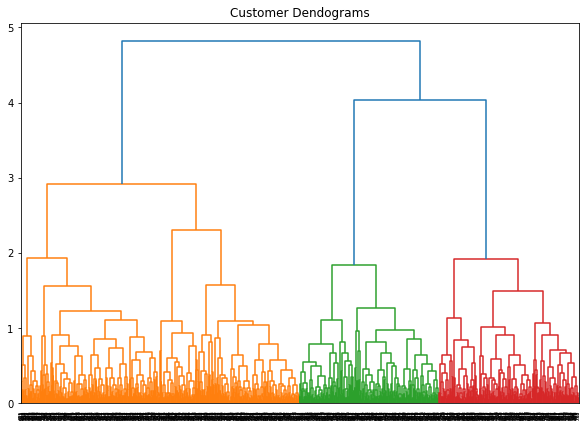

In [26]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, metric='euclidean', method='complete'))
plt.show()

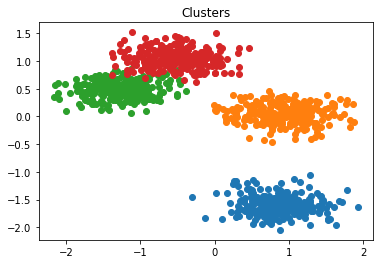

In [27]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete').fit(X)
#{“ward”, “complete”, “average”, “single”},

# assign a cluster to each example
yhatac=model.fit_predict(X)

draw(X,yhatac)

##### À partir de notre ensemble de textes

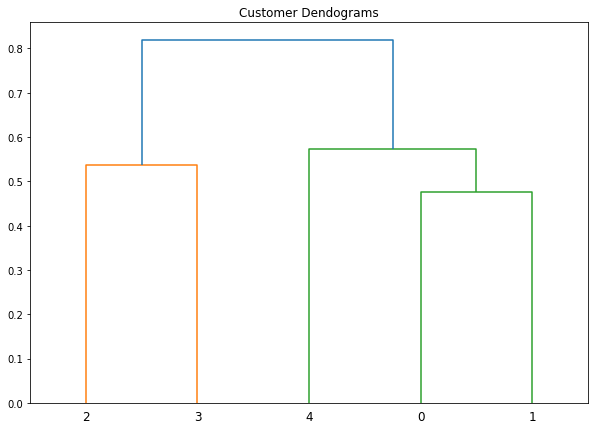

In [28]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(tfidf_Matrix, metric='euclidean', method='complete'))
plt.show()

#### <font color = 'E3A440'>3.3.3. DBSCAN</font>

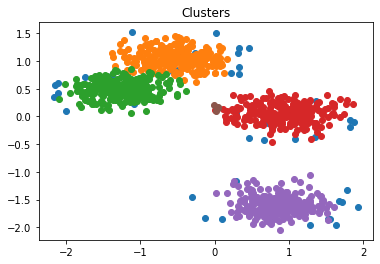

In [29]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.2, min_samples=4, metric="euclidean").fit(X)

# assign a cluster to each example
yhatdbs=model.fit_predict(X)

draw(X,yhatdbs)

#### <font color = 'E3A440'>3.3.4. Analyse du contenu des groupes</font>

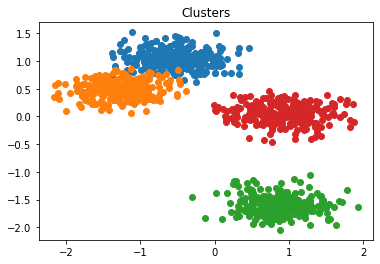

Silhouette= 0.721826710101402


In [30]:
model = KMeans(n_clusters=4, max_iter=20, n_init=1, init="random", random_state=1).fit(X)

# assign a cluster to each example
labels = model.predict(X)

draw(X,labels)

print("Silhouette=", silhouette_score(X, labels, metric="euclidean"))

In [31]:
clusters = unique(yhatkm)

for cluster in clusters:
    C = X[yhatkm[:] == cluster]
    labels=yhatkm[yhatkm[:] == cluster]
    print('Cluster %1.0f : size = %.0f' % (cluster, len(C)))

Cluster 0 : size = 250
Cluster 1 : size = 126
Cluster 2 : size = 249
Cluster 3 : size = 125
Cluster 4 : size = 250


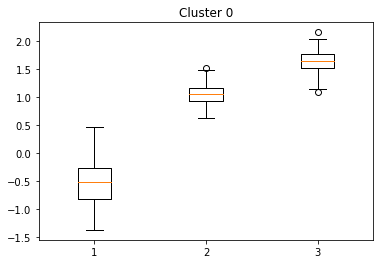

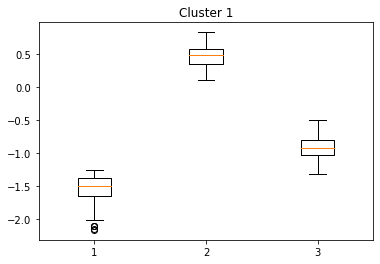

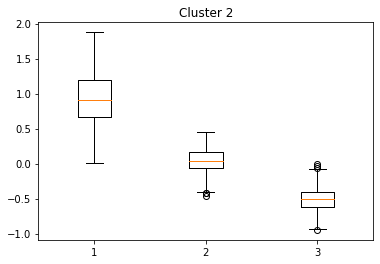

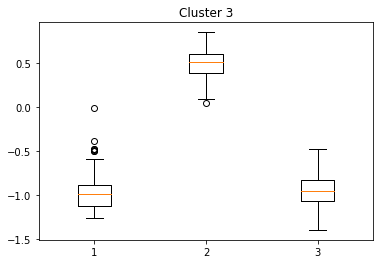

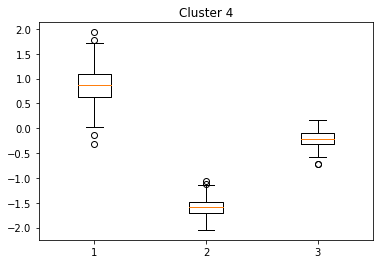

In [32]:
for cluster in clusters:
    C = X[yhatkm[:] == cluster]
    fig1, ax1 = plt.subplots()
    ax1.set_title('Cluster %1.0f' % (cluster))
    ax1.boxplot(C);

# <font color = 'E3A440'>4. Méthodes supervisées</font>




## <font color = 'E3A440'>4.1. Perceptron multicouches</font>

Avant de rentrer dans les détails, il est nécessaire de préparer le corpus.

In [33]:
text2="""At eight o'clock, on Thursday morning, the great Arthur didn't feel VERY good.
This morning, at nine o'clock, Arthur is feeling better.
A dog runs in the street.
In my city, cats run in the street.
A little boy is running in the street.
Arthur is my dog, we love to walk in the street together."""

In [34]:
# Clean
sentences2 = nltk.sent_tokenize(text2)
cleaned_sentences2 = [CleaningText(sent, reduce = 'stem', list_pos_to_keep = ['NOUN','ADJ','VERB']) for sent in sentences2]

# Calculate the tfidf matrix
freq_term_DTM2 = vectorized.fit_transform([[w for w, pos in sent] for sent in cleaned_sentences2])
tfidf = TfidfTransformer(norm='l1')
tfidf_DTM2 = tfidf.fit_transform(freq_term_DTM2)

# convert in Dataframe for pedagogical reason
tfidf_Matrix2 = pd.DataFrame(tfidf_DTM2.toarray(), columns =  [k for k, v in sorted(vectorized.vocabulary_.items(), key=lambda item: item[1])] )
tfidf_Array2 = tfidf_DTM2.toarray()
print(tfidf_Matrix2)


     arthur       boy       cat      citi       dog      feel      good  \
0  0.129833  0.000000  0.000000  0.000000  0.000000  0.153781  0.187535   
1  0.296832  0.000000  0.000000  0.000000  0.000000  0.351584  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.389447  0.000000  0.000000   
3  0.000000  0.000000  0.304361  0.304361  0.000000  0.000000  0.000000   
4  0.000000  0.304361  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.168627  0.000000  0.000000  0.000000  0.199731  0.000000  0.000000   

      great     littl      love      morn       run    street  thursday  \
0  0.187535  0.000000  0.000000  0.153781  0.000000  0.000000  0.187535   
1  0.000000  0.000000  0.000000  0.351584  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.328798  0.281755  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.210713  0.180565  0.000000   
4  0.000000  0.304361  0.000000  0.000000  0.210713  0.180565  0.000000   
5  0.000000  0.000000  0

### <font color = 'E3A440'>4.1.1. Préparation du corpus d'entraînement et de test</font>

In [35]:
from sklearn.neural_network import MLPClassifier

#split the data
X_train, X_test = tfidf_Array2[:5,:], tfidf_Array2[5:,:]
y_train, y_test = [1,1,2,2,2],[2]

### <font color = 'E3A440'>4.1.2. Entraînement</font>

In [36]:
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=5, learning_rate="constant", learning_rate_init=0.01)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=5, learning_rate_init=0.01, max_iter=300,
              random_state=1)

### <font color = 'E3A440'>4.1.3. Évaluaiton du modèle</font>

Les variables `y_valid`, qui permet d'évaluer le taux d'erreur dans l'aprentissage et `y_pred`, qui permet d'évaluer les erreurs dans la phase de prédiciton, sont générées dans le bloc de code suivant.

In [37]:
y_valid=clf.predict(X_train)
y_pred=clf.predict(X_test)

La fonction `accuracy_score()` permet de calculer la metrique d'évaluation, qui est l'**accuracy**.

In [39]:
from sklearn.metrics import accuracy_score

print("Learning errors")
print("    Accuracy = ", accuracy_score(y_train, y_valid)*100)

print("\nPrediction errors")
print("    Accuracy = ", accuracy_score(y_test, y_pred)*100)

Learning errors
    Accurary =  100.0

Prediction errors
    Accurary =  100.0


In [40]:
from sklearn.metrics import confusion_matrix

print("\n** Learning performances: **") 
print("Confusion Matrix: ") 
print(confusion_matrix(y_train, y_valid))
print ("Accuracy : ", accuracy_score(y_train, y_valid)*100) 
print("** Prediction performances: **") 
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 


** Learning performances: **
Confusion Matrix: 
[[2 0]
 [0 3]]
Accuracy :  100.0
** Prediction performances: **
Confusion Matrix: 
[[1]]
Accuracy :  100.0


# <font color = 'E3A440'>5. Exercice : Analyse de la base donnée 20 Newsgroups</font>

La base de données `20 Newsgroups` est une collection d'environ 20,000 documents segmentés en plus ou moins 20 thèmatiques différentes.

Les données sont téléchargées à partir du module `sklearn.datasets` et sont reorganisées en format tabulaire. Pour des raisons pédagogiques, cet exercice prévoit l'utilisation d'un échantillon d'environ 3,000 documents segmentés en 3 groupes différents : 
 1. `rec.autos`, identifié avec la valeur `7` dans la colonne `target`
 2. `rec.sport.hockey`, identifié avec la valeur `10` dans la colonne `target`
 3. `sci.med`, identifié avec la valeur `13` dans la colonne `target`

Pendant l'exercice, le participant sera invité à remplir les parties manquantes du code qui sont indiquées avec `...` (trois points).

In [42]:
from sklearn.datasets import fetch_20newsgroups
archive20newsgroup = fetch_20newsgroups(subset = 'all')
df = pd.DataFrame({'Text': archive20newsgroup.data, 'target': archive20newsgroup.target})
target_names = archive20newsgroup.target_names
print(target_names)

# subset selection
target_selected = [7,10,13]
df = df[df.target.isin(target_selected)]
target_names = [x for idx, x in enumerate(target_names) if idx in target_selected]
print(target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
['rec.autos', 'rec.sport.hockey', 'sci.med']


La base de données est composée de 2,979 documents, segmentés en 3 thématiques.

In [43]:
df.shape

(2979, 2)

Voici les noms de variables disponibles.

In [44]:
df.columns

Index(['Text', 'target'], dtype='object')

Voici une observation (une ligne du tableau de données):

In [46]:
df.iloc[284].Text

"From: yozzo@watson.ibm.com (Ralph Yozzo)\nSubject: Cold Sore Location?\nDisclaimer: This posting represents the poster's views, not necessarily those of IBM.\nNntp-Posting-Host: king-arthur.watson.ibm.com\nOrganization: IBM T.J. Watson Research Center\nLines: 11\n\nI've had cold sores in the past.  But they have always been in the \ncorner of my mouth.  Recently,  I've had what appears to be\na cold sore, but on my lower lip in the middle (above the chin).\n\nCan cold sores appear anywhere around the mouth (or body)?\n\nIs there a medical term for cold sore?\n\n-- \n Ralph Yozzo (yozzo@watson.ibm.com)  \n From the beautiful and historic New York State Mid-Hudson Valley.\n"

## <font color = 'E3A440'>5.1 Présentation de l'exercice </font>

L'exercise est composé de deux parties:

 1. Remplir les parties de code qui manquent (indiquées avec les `...`)
 2. Changer les paramètres du prétraitement pour expérimenter les impacts qu'ils peuvent avoir sur les méthodes non supervisées et supervisées. En particulier, vous êtes invités à expérimenter les opérations suivantes :

    2.1. Choisir une sélection de POS tag différents (fonction `CleaningText()`)

    2.2. Éliminer des mots de votre choix en les ajoutant dans la liste de stopword (fonction `CleaningText()`)

    2.3. Changer la seuil de fréquence minimale pour retenir un mot dans la matrice (fonction `CountVectorizer()`)

    2.4 Ajouter des bigrams et trigrams lors de la vectorisation (fonction `CountVectorizer()`)



Si vous voulez aller plus loin, vous pourriez aussi changer les paramètres des algorithmes non supervisés et supervisés pour anlyser les impacts sur les résultats. 


Rappel: voici la liste de POS tag existant.

| **POS** | **DESCRIPTION**           | **EXAMPLES**                                      |
| ------- | ------------------------- | ------------------------------------------------- |
| ADJ     | adjective                 | big, old, green, incomprehensible, first      |
| ADP     | adposition                | in, to, during                                |
| ADV     | adverb                    | very, tomorrow, down, where, there            |
| AUX     | auxiliary                 | is, has (done), will (do), should (do)        |
| CONJ    | conjunction               | and, or, but                                  |
| CCONJ   | coordinating conjunction  | and, or, but                                  |
| DET     | determiner                | a, an, the                                    |
| INTJ    | interjection              | psst, ouch, bravo, hello                      |
| NOUN    | noun                      | girl, cat, tree, air, beauty                  |
| NUM     | numeral                   | 1, 2017, one, seventy-seven, IV, MMXIV        |
| PART    | particle                  | ’s, not                                      |
| PRON    | pronoun                   | I, you, he, she, myself, themselves, somebody |
| PROPN   | proper noun               | Mary, John, London, NATO, HBO                 |
| PUNCT   | punctuation               | ., (, ), ?                                    |
| SCONJ   | subordinating conjunction | if, while, that                               |
| SYM     | symbol                    | $, %, §, ©, +, −, ×, ÷, =, :)               |
| VERB    | verb                      | run, runs, running, eat, ate, eating          |
| X       | other                     | sfpksdpsxmsa                                  |
| SPACE   | space                     |                                                   |

### <font color = 'E3A440'> a. Construction de certaines fonctions qui serviront plus tard.</font>


In [76]:
def plot_data_by_cluster(DTM, cls_kmeans, figsize = (16,10) ):
    ## Reduction of dimension to 2 for visualisation reasons
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt
    import time
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,metric='cosine', learning_rate=10, random_state = 794)
    reduc_dim_results = tsne.fit_transform(DTM)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    ## Create data structure for plotting
    df_reduction = pd.DataFrame()
    df_reduction['y'] =  cls_kmeans.labels_
    df_reduction['1-dim'] = reduc_dim_results[:,0]
    df_reduction['2-dim'] = reduc_dim_results[:,1]

    ## Generate the plot
    import seaborn as sns
    import colorcet as cc
    plt.figure(figsize = figsize)
    sns.scatterplot(data = df_reduction,
                    x="1-dim",
                    y="2-dim",
                    hue="y",
                    palette = sns.color_palette(cc.glasbey, n_colors = cls_kmeans.n_clusters),)

    plt.show()

def prepare_data_for_WC(DTM, vocabulary_dtm):
    import scipy
    # compute total frequency for each word
    values_words = sum(DTM)
    # values_words = sum(tfidf_matrix)
    # verify type result and prepare data for wordcloud
    if type(values_words) is np.ndarray:
        values_words = [float(value) for value in np.nditer(values_words)]
    elif type(values_words) is scipy.sparse.csr.csr_matrix:
        values_words = [float(value) for value in np.nditer(values_words.todense())]
    else:
        print("Matrix in argument DTM has to be one of these two data classes:  'scipy.sparse.csr.csr_matrix' or 'numpy.ndarray'")
    ##Retrieve the word fromthe vocaboulary and sorting them based on the frequency
    list_mots = sorted(vocabulary_dtm.items(), key= lambda x:x[1])
    list_mots = [word for (word,idx) in  list_mots]
    words = zip(list_mots, values_words)
    words = sorted(words, key= lambda x:x[1], reverse=True)
    ## prepare data structure for wordcloud
    result_for_WC = {}
    #iterating over the tuples lists
    for (key, value) in words:
        result_for_WC[key] = value
    #
    return result_for_WC


def wordcloud_par_cluster(wordcloud, DTM, cls_kmeans, vocab, first_n_words=10, figsize=(18, 16), fontsize=32, plot_wordcloud = True, lst_clust = [], title_in_plot = "Clust_"):

        """
        wordcloud; A WordCloud function.
        DTM; A Docuemnt-Term Matrix
        vocab; It is a vocabulary from skllarn vectorizer
        first_n_words = 10; How many words to print
        figsize = (18, 16); Size of the plot. (this is the argument of this line plt.figure(figsize=figsize))
        fontsize = 32; Size of title font
        lst_clust = []; The list of cluster to plot. If empty, all the clusters are plotted
        title_in_plot = "Clust_"; title to put on top of plot \n
        """
        import numpy
        import scipy
        
        if not lst_clust:
            lst_clust = list(range(cls_kmeans.n_clusters))

        for x in lst_clust:
            DTM_temp = DTM[cls_kmeans.labels_ == x]
            result_for_WC= prepare_data_for_WC(DTM_temp, vocab)
            ###
            if plot_wordcloud == True:
                plot = wordcloud.generate_from_frequencies(result_for_WC)
                plt.figure(figsize=figsize)
                plt.imshow(plot)
                plt.title(title_in_plot + str(x) + '  N. of documents=' + str(DTM_temp.shape[0]),
                        fontsize = fontsize,
                        bbox=dict(facecolor='red', alpha=0.5))
                plt.axis('off')
                plt.show()
            print(f"Most frequent words for cluster {x} of size {str(DTM_temp.shape[0])} docs: ", list(result_for_WC)[0:first_n_words])

### <font color = 'E3A440'> b. Annotation, nettoyage et vectorisation des blogs (Rappels)</font>

Nous utilisons la fonction écrite précédemment pour nettoyer les unités lexicales.

Pour ce premier test, conservez seulement le noms (`NOUN`). Remplir la portion de code qui manque `...`.

Cette opération prendra quelques secondes. 

In [81]:
cleaned_20news = [CleaningText(sent, reduce = 'lemma', list_pos_to_keep = [...], Stopwords_to_add=['msg']) for sent in list(df['Text'])]

Dans l'étape de vectorisation, nous retenons les mots qui apparaissent dans au moins 15 documents (min_df = 15). 

Remplir la portion de code manquant indiqué par `...`.

In [82]:
# Initialisation de l'objet
def identity_tokenizer(text):
    return text
# Transforming the word in frequencies
vectorized = CountVectorizer(lowercase = False, # Convert all characters to lowercase before tokenizing
                             min_df = ..., # Ignore terms that have a document frequency strictly lower than the given threshold 
                             max_df = 1200, # Ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)
                             stop_words = stopwords.words('english'), # Remove the list of words provided
                             ngram_range = (1, 3), # Get the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
                             tokenizer=identity_tokenizer) # Override the string tokenization step while preserving the preprocessing and n-grams generation steps

In [83]:
freq_term_DTM_20news = vectorized.fit_transform([[w for w, pos in sent if len(w) > 2] for sent in cleaned_20news])
freq_term_DTM_20news

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  % sorted(inconsistent)


<2979x2988 sparse matrix of type '<class 'numpy.int64'>'
	with 129200 stored elements in Compressed Sparse Row format>

In [84]:
# Calculate the tfidf matrix
tfidf = TfidfTransformer(norm='l1')
tfidf_DTM_20news = tfidf.fit_transform(freq_term_DTM_20news)
#print(tfidf_DTM)

tfidf_DF_20news = pd.DataFrame(tfidf_DTM_20news.toarray(), columns =  [k for k, v in sorted(vectorized.vocabulary_.items(), key=lambda item: item[1])] )
print(tfidf_DF_20news)

      aas7  aas7 andrew  aas7 andrew spencer       abc  abc coverage  ability  \
0      0.0          0.0                  0.0  0.000000      0.000000      0.0   
1      0.0          0.0                  0.0  0.054242      0.021253      0.0   
2      0.0          0.0                  0.0  0.000000      0.000000      0.0   
3      0.0          0.0                  0.0  0.000000      0.000000      0.0   
4      0.0          0.0                  0.0  0.000000      0.000000      0.0   
...    ...          ...                  ...       ...           ...      ...   
2974   0.0          0.0                  0.0  0.000000      0.000000      0.0   
2975   0.0          0.0                  0.0  0.000000      0.000000      0.0   
2976   0.0          0.0                  0.0  0.000000      0.000000      0.0   
2977   0.0          0.0                  0.0  0.000000      0.000000      0.0   
2978   0.0          0.0                  0.0  0.000000      0.000000      0.0   

      acceleration  access 

## <font color = 'E3A440'>5.2 Question méthodes non supervisées </font>

1. Séparer les messages en groupes homogènes en utilisant un clustering


### <font color = 'E3A440'> a. Évaluer la meilleure partition</font>
 Dans le prochain bloc de code, vous devez choisir les valeurs des variables suivantes:
 1.   `min_k`, qui determine le plus petit nombre de cluster à générer pour l'évaluation.
 2.   `max_k`, qui determine le plus grand nombre de cluster à générer pour l'évaluation.

Remplir les portions de code qui manquent `...`.

Aux fins de cet exercice, n'executez pas plus de 30 segmentations différentes!

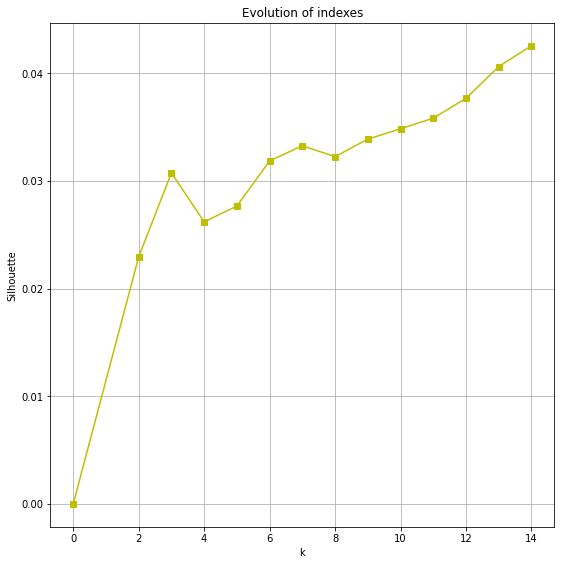

In [91]:
# Code for kl evaluation
min_k = ...
max_k = ...

Sil=np.zeros(max_k)
x_axis=np.zeros(max_k)
tfidf_DTM_20news_norm = Normalizer().transform(tfidf_DTM_20news)

for m in range (min_k, max_k) :

    model = KMeans(n_clusters=m, max_iter=100, n_init=1, init="k-means++", random_state=3).fit(tfidf_DTM_20news_norm)

    # assign a cluster to each example
    labels = model.predict(tfidf_DTM_20news_norm)

    Sil[m]=silhouette_score(tfidf_DTM_20news_norm, labels, metric="cosine")
    x_axis[m]=m

fig = plt.figure(figsize=(7, 7))
a1 = fig.add_axes([0,0,1,1])
l1 = a1.plot(x_axis, Sil,'ys-') # solid line with yellow colour and square marker
a1.set_xlabel('k')
a1.set_ylabel('Silhouette')
a1.set_title('Evolution of indexes')
a1.yaxis.grid(True)
a1.xaxis.grid(True)
plt.show()

### <font color = 'E3A440'> b. Éxecuter clustering avec k fixé</font>
Ajouter le nombre de clusters définitif que vous avez choisi en analysant le graphique précedent. 

Pour coherence avec le nombre de groupes de la base de données, essayez d'abord avec `n_cluster = 3`.

Remplir les trois points `...`

In [92]:
tfidf_DTM_20news_norm = Normalizer().transform(tfidf_DTM_20news.toarray())
model = KMeans(n_clusters = ..., max_iter=200, n_init=1, init="k-means++", random_state=1).fit(tfidf_DTM_20news_norm)
# assign a cluster to each example
labels = model.predict(tfidf_DTM_20news_norm)

print("Silhouette=", silhouette_score(tfidf_DTM_20news_norm, labels, metric="cosine"))

Silhouette= 0.02520646673636625


In [93]:
model.n_clusters

3

In [94]:
Counter(model.labels_)

Counter({1: 882, 2: 1359, 0: 738})

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2979 samples in 0.009s...
[t-SNE] Computed neighbors for 2979 samples in 1.206s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2979
[t-SNE] Computed conditional probabilities for sample 2000 / 2979
[t-SNE] Computed conditional probabilities for sample 2979 / 2979
[t-SNE] Mean sigma: 0.295882
[t-SNE] KL divergence after 50 iterations with early exaggeration: 83.359245
[t-SNE] KL divergence after 1000 iterations: 1.669910
t-SNE done! Time elapsed: 23.88258671760559 seconds


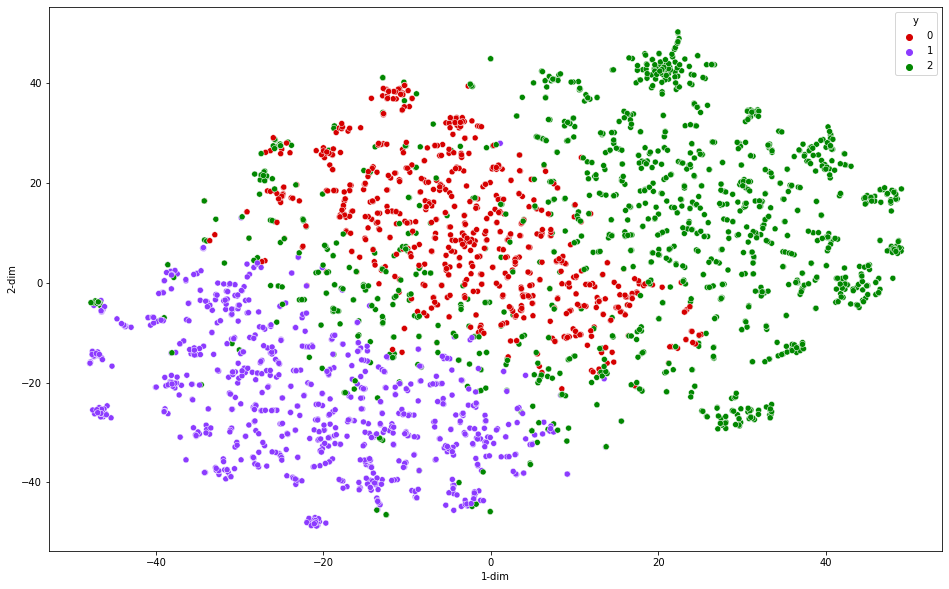

In [95]:
tfidf_DTM_20news_norm = Normalizer().transform(tfidf_DTM_20news.toarray())
plot_data_by_cluster(tfidf_DTM_20news_norm, model )

### <font color = 'E3A440'> c. Regarder les résultats des clusters</font>

In [96]:
from wordcloud import WordCloud
wordcloud_par_cluster(wordcloud = WordCloud(), # WordCloud function. 
                      DTM = tfidf_DTM_20news_norm,# Document-Term Matrix 
                      cls_kmeans = model, # Insert the result of a kmeans clustering
                      vocab = vectorized.vocabulary_, # a vocabulary from scikitlearn vectorizer
                      first_n_words=10,#  It indicates how many words to print
                      figsize=(12, 10),
                      fontsize=32,
                      plot_wordcloud = False, # Switch to True if you want to plot wordclouds
                      lst_clust = [], # Insert a list of integer to get info about a selected number of cluster. It shows info of all the clustrs if empty list
                      title_in_plot = "Clust_")

Most frequent words for cluster 0 of size 738 docs:  ['car', 'engine', 'oil', 'dealer', 'price', 'ford', 'speed', 'model', 'distribution', 'time']
Most frequent words for cluster 1 of size 882 docs:  ['game', 'team', 'player', 'hockey', 'nhl', 'playoff', 'espn', 'fan', 'year', 'goal']
Most frequent words for cluster 2 of size 1359 docs:  ['doctor', 'people', 'food', 'bank', 'anyone', 'disease', 'distribution', 'problem', 'geb', 'line article']


### <font color = 'E3A440'> d. Évaluer la partition générée avec les target de départ</font>
L'objectif du prochain bloc de code est de modifier les étiquettes de départ des données, qui sont dans la variable `target`, afin de les faire coïncider avec les étiquettes données par l'algorithme. 

Ainsi, si une segmentaiton en 3 clusters a été générée, il faudra:

 1.   Interpéter les résultats et identifier quel cluster correspond à quelle quelle étiquette `target`.
 2.   Modifier les étiquettes et les faire correspondre au `target`, 
 
<font color = 'E3A440'><bold>Par example, si la segmentation à trois cluster nous montre que le cluster `0` ressemble au sujet `rec.autos`, identifié avec la valeur `7` dans la colonne `target`, alors nous devons substituer tous les `7` par `0`. </bold></font>

Voici les étiquettes des 3 groupes: 
 1. `rec.autos`, identifié avec la valeur `7` dans la colonne `target`
 2. `rec.sport.hockey`, identifié avec la valeur `10` dans la colonne `target`
 3. `sci.med`, identifié avec la valeur `13` dans la colonne `target`

In [97]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
df['target_converted'] = df.target
df['target_converted'] = df.target_converted.apply(lambda x: 0 if x == 7 else x)
df['target_converted'] = df.target_converted.apply(lambda x: 1 if x == 10 else x)
df['target_converted'] = df.target_converted.apply(lambda x: 2 if x == 13 else x)
print(accuracy_score(df.target_converted, model.labels_))

0.8754615642833166


Êtes-vous en mesure d'ameliorer la métrique d'évaluation (`accuracy`) en modifiant les inputs du modèle? Par example, en ajoutant des bigrammes et trigrammes?

## <font color = 'E3A440'>5.3 Question méthodes supervisées </font>

### <font color = 'E3A440'> a. Classifier les messages dans les groupes de départ</font>
Dans le prochain bloc de code, un modèle supervisé est généré pour reconnaitre les docuemnts qui font partie d'une des suivantes étiquerttes:

 1. `rec.autos`, identifié avec la valeur `7` dans la colonne `target`
 2. `rec.sport.hockey`, identifié avec la valeur `10` dans la colonne `target`
 3. `sci.med`, identifié avec la valeur `13` dans la colonne `target`

Pour se faire, un corpus d'entrainement (`X_train`) accompagné par les étiquettes qui corresopndent à chaque document (`y_train`) et un corpus de test (`X_test`accompagné par `y_test`) sont construits. 

Le corpus dMentrainemenet (`X_train`) servira pour apprendre un réseaux de neurones à classifier les docuemnts avec la bonne étiquette. Le corpus de test `X_test`, servira à évaluer la performace du modèle. 

La fonction `train_test_split()`est utilisée pour créer ces corpus, et l'argument `test_size`deterine la propotion du corpus qui constituira le corpus de text (`X_test`).

In [98]:
from sklearn.model_selection import train_test_split
tfidf_DTM_20news_norm = Normalizer().transform(tfidf_DTM_20news)
X_train, X_test, y_train, y_test = train_test_split(tfidf_DTM_20news_norm, df.target, test_size = 0.2,  random_state=1)

Voici les nombre de documents dans les corpus d'entrainement et de test.

In [99]:
print(X_train.shape)
print(len(y_train))

(2383, 2988)
2383


In [100]:
print(X_test.shape)
print(len(y_test))

(596, 2988)
596


### <font color = 'E3A440'> b. Entrainement du modèle</font>

Avec la fonction `MLPClassifier()`, un réseaux de neurones est construit pour la reconnaissance de documents selon les étiquettes selectionnées.

In [101]:
cls = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

### <font color = 'E3A440'> b. Validation des performances d'apprentissage</font>

Dans les prochains blcos de code, le corpus de test (`X_test`) est utilisé pour évaluer le modèle. 


Validation des performances de prédictions. 
Ajoutez les bons variables pour générer la `y_valid`, qui permet d'évaluer le taux d'erreur dans l'aprentissage et le `y_pred`, qui permet d'évaluer les erreurs dans la phase de prédiciton.

Remplir les portions de code vides `...`.

Insipirez vous par la section `4.1.3.`du présent script.




In [106]:
y_valid = cls.predict(X_train)
y_pred = cls.predict(X_test)

In [112]:
print("Learning errors")
print("    Accurary = ", accuracy_score(y_train, y_valid)*100)

print("\nPrediction errors")
print("    Accurary = ", accuracy_score(y_test, y_pred)*100)

Learning errors
    Accurary =  100.0

Prediction errors
    Accurary =  99.16107382550335


In [113]:
print(confusion_matrix(y_test, y_pred))

[[204   0   0]
 [  0 197   2]
 [  2   1 190]]


# <font color = 'E3A440'> 6. Conclusion </font>
Dans cet atelier, vous avez appris à manipuler des docuemnts ;a des fins d'analyse sémantique. Vous avez pu expérimentr les impact du prétraitement sur les résultats des algorithme d'apprentissage.

Enfin, vous avez aussi remarqué que, si voutre base de données contient déjà de3s étiquettes, il est plus efficace d.utiliser une méthode supervisée. Toutefois, les méthodes non supervisées sont effica pour donner des étiquettes par si ilairt.s entre données et pour une expliration de votre base de données

-----

-----